## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [39]:
import pandas as pd
import numpy as np
%matplotlib inline

In [40]:
data = pd.DataFrame(data = ["台灣","中國","香港","澳門"],
                    columns=['Countries'])
data['Population'] = np.random.randint(low = 20,
                                       high= 1000,
                                       size= 4)
data.head()

,Countries,Population
0,台灣,565
1,中國,281
2,香港,926
3,澳門,52


In [41]:
data.loc[data['Population'].idxmax(),:]

Countries      香港
Population    926
Name: 2, dtype: object

## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [42]:
import requests

In [43]:
# 把連結填入
url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"
response = requests.get(url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:200]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg\nn00015388_304\thttp://farm1.static.flickr.com/27/51'

In [44]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
data = data.split("\n")
print(len(data))
data[0:5]

9996


['n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'n00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'n00015388_304\thttp://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
 'n00015388_327\thttp://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
 'n00015388_355\thttp://img100.imageshack.us/img100/3253/forrest004fs9.jpg']

## 將 txt 轉成 pandas dataframe

In [45]:
arrange_data = [i.split('\t') for i in data]
    
df = pd.DataFrame(arrange_data, columns=['filename', 'url'])
df.head(10)

,filename,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...
5,n00015388_373,http://img172.imageshack.us/img172/4606/napo03...
6,n00015388_379,http://fotootjesvanannelies.web-log.nl/olifant...
7,n00015388_388,http://www.deweekkrant.nl/images/library/pictu...
8,n00015388_442,http://www.porschemania.it/discus/messages/815...
9,n00015388_474,http://farm1.static.flickr.com/72/225029238_80...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [46]:
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

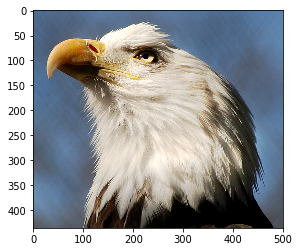

In [47]:
# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0, "url"]
response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array
plt.imshow(img)
plt.show()

In [48]:
def img2arr_fromURLs(url_list, resize = False):
    img_list = []
    for web in url_list:
        img = None
        try:
            response = requests.get(web)
            img = Image.open(BytesIO(response.content))
        except:
            print('No response: ', web) #有錯誤時顯示網址
        if img is not None:
            img_list.append(img)           
    return img_list

No response:  http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
No response:  http://img172.imageshack.us/img172/4606/napo03072en9.jpg
Total images that we got: 4 


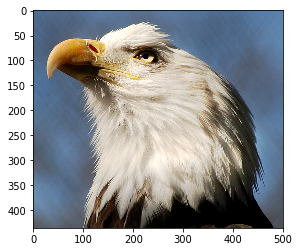

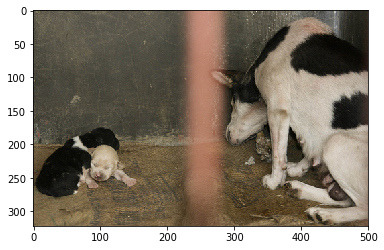

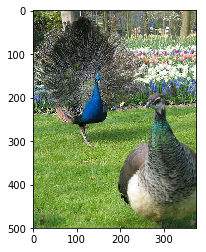

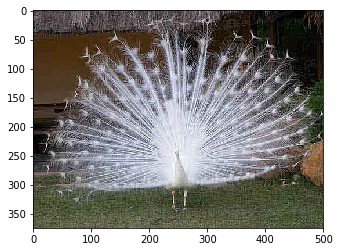

In [51]:
result = img2arr_fromURLs(df.loc[0:5, 'url'])
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

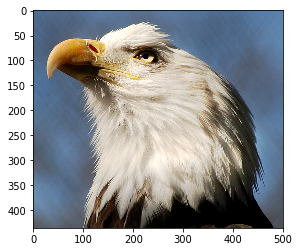

成功1張，第1個迴圈


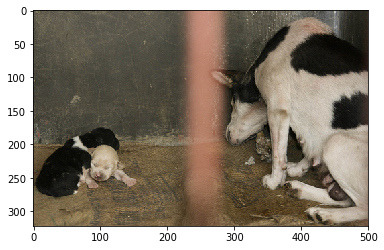

成功2張，第2個迴圈


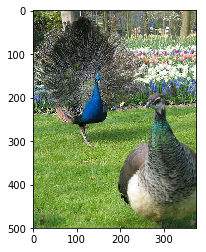

成功3張，第3個迴圈


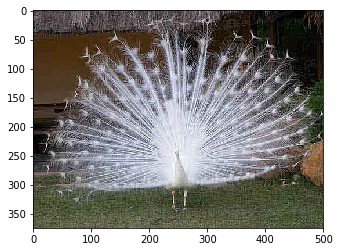

成功4張，第4個迴圈
No response:  http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
成功4張，第5個迴圈
No response:  http://img172.imageshack.us/img172/4606/napo03072en9.jpg
成功4張，第6個迴圈
No response:  http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg
成功4張，第7個迴圈
No response:  http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg
成功4張，第8個迴圈
No response:  http://www.porschemania.it/discus/messages/815/102099.jpg
成功4張，第9個迴圈


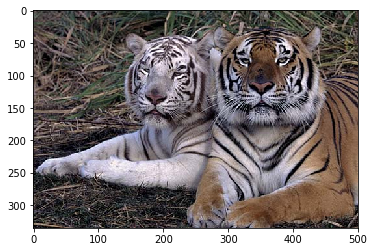

成功5張，第10個迴圈


In [52]:
# 成功讀取圖片數量
img_count = 0 
loop_count = 0
# 成功讀取5張圖片才結束迴圈
while img_count < 5: 
    # 測試程式碼是否能執行
    try:
        img = Image.open(BytesIO(requests.get(df.loc[loop_count, 'url']).content))
    # 失敗的話輸出失敗的網址
    except:
        print('No response: ', df.loc[loop_count, 'url'])
    # 成功存取圖片時，輸出圖片並將count數量+1
    else:
        plt.imshow(img)
        plt.show()
        img_count += 1
    # 不論成功或失敗，迴圈數都要往上加
    finally:
        loop_count += 1
        print(f"成功{img_count}張，第{loop_count}個迴圈")

0:corr:<Response [200]>


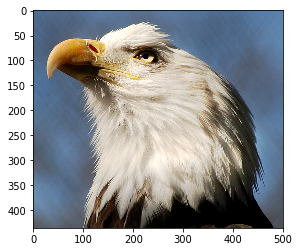

1:corr:<Response [200]>


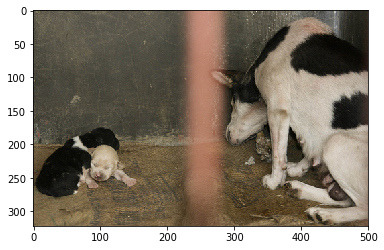

2:corr:<Response [200]>


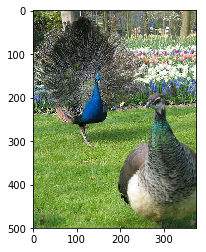

3:corr:<Response [200]>


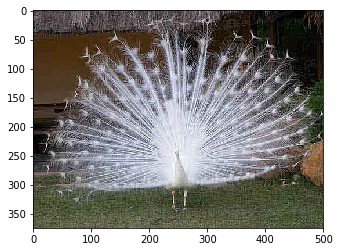

4:error
5:error
6:corr:<Response [200]>


OSError: cannot identify image file <_io.BytesIO object at 0x000001850B2E4FC0>

In [89]:
loop = 0
cond = 0
while cond < 5 :
    img = requests.get(df.loc[loop, 'url'])
    if (img.status_code == 200): # 部分網站能正常爬到資料，但並非圖片。這裡的判斷式可以再調整為，判斷是否為圖片的資料
        print(f"{loop}:corr:{img}")
        plt.imshow(Image.open(BytesIO(img.content)))
        plt.show()
        cond += 1
        loop += 1
    else:
        print(f"{loop}:error")
        loop += 1        